In [3]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

100%|███████████████████████████████████████▊| 100M/100M [00:14<00:00, 9.69MB/s]
100%|████████████████████████████████████████| 100M/100M [00:14<00:00, 7.50MB/s]


In [4]:
!unzip bitcoin-historical-data.zip -d data_input

Archive:  bitcoin-historical-data.zip
  inflating: data_input/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data_input/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

# Data Periods used in Notebook
plot_period = slice('2020-7-7 0:00','2020-7-7 8:00') # Selectio Plot Period for visualisation only
data_period = slice('2020-7-6 13:21','2020-9-14 0:00') # Select Data Period for Analysis

In [6]:
path = ('./data_input/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [7]:
df = pd.read_csv(path,parse_dates=[0],
                 date_parser=dateparse,
                 index_col='Timestamp')
df.head()

/tmp/ipykernel_17213/1437902948.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path,parse_dates=[0],


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 14:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 14:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 14:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_slice = df.loc[data_period]
df_slice.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-07-06 13:21:00+00:00,9159.81,9216.08,9158.24,9206.87,72.403235,665843.202960,9196.318457
2020-07-06 13:22:00+00:00,9210.47,9229.14,9204.80,9205.50,65.679782,605407.986240,9217.569910
2020-07-06 13:23:00+00:00,9204.00,9210.46,9195.24,9195.24,18.610930,171193.248260,9198.532907
2020-07-06 13:24:00+00:00,9200.85,9200.85,9191.87,9195.32,1.282943,11797.461604,9195.621117
2020-07-06 13:25:00+00:00,9195.32,9200.97,9195.24,9196.15,5.035894,46307.718550,9195.530340


In [9]:
df_clean = df_slice.fillna(method='ffill').fillna(value=0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2020-07-06 13:21:00+00:00 to 2020-09-14 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Open               100000 non-null  float64
 1   High               100000 non-null  float64
 2   Low                100000 non-null  float64
 3   Close              100000 non-null  float64
 4   Volume_(BTC)       100000 non-null  float64
 5   Volume_(Currency)  100000 non-null  float64
 6   Weighted_Price     100000 non-null  float64
dtypes: float64(7)
memory usage: 6.1 MB


In [10]:
df_clean.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-07-06 13:21:00+00:00,9159.81,9216.08,9158.24,9206.87,72.403235,665843.202960,9196.318457
2020-07-06 13:22:00+00:00,9210.47,9229.14,9204.80,9205.50,65.679782,605407.986240,9217.569910
2020-07-06 13:23:00+00:00,9204.00,9210.46,9195.24,9195.24,18.610930,171193.248260,9198.532907
2020-07-06 13:24:00+00:00,9200.85,9200.85,9191.87,9195.32,1.282943,11797.461604,9195.621117
2020-07-06 13:25:00+00:00,9195.32,9200.97,9195.24,9196.15,5.035894,46307.718550,9195.530340


In [11]:
df_clean.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [12]:
# find the duplicates

df_clean[df_clean.index.duplicated(keep=False)]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,


In [13]:
df_clean.shape

(100000, 7)

In [14]:
# split the dataframe into two parts called df_train and df_test. df_train has 80% of the data and df_test has 20% of the data.

df_train = df_clean.iloc[:int(len(df_clean)*0.8)]
df_test = df_clean.iloc[int(len(df_clean)*0.8):]

# print the shape of the train and test dataframes
(df_train.shape, df_test.shape)


((80000, 7), (20000, 7))

In [15]:
df_train.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-07-06 13:21:00+00:00,9159.81,9216.08,9158.24,9206.87,72.403235,665843.202960,9196.318457
2020-07-06 13:22:00+00:00,9210.47,9229.14,9204.80,9205.50,65.679782,605407.986240,9217.569910
2020-07-06 13:23:00+00:00,9204.00,9210.46,9195.24,9195.24,18.610930,171193.248260,9198.532907
2020-07-06 13:24:00+00:00,9200.85,9200.85,9191.87,9195.32,1.282943,11797.461604,9195.621117
2020-07-06 13:25:00+00:00,9195.32,9200.97,9195.24,9196.15,5.035894,46307.718550,9195.530340


In [16]:
df_train.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000
mean,10706.632751,10710.90847,10703.053804,10706.971816,4.596007,4.991552e+04,10707.441371
std,1116.139336,1117.61125,1115.009576,1116.231333,13.196102,1.442304e+05,1116.412330
min,9035.760000,9041.22000,9026.510000,9040.000000,0.000020,1.901695e-01,9035.111008
25%,9319.045000,9321.71000,9316.457500,9319.500000,0.190089,2.004901e+03,9319.727473
50%,11268.335000,11275.06000,11263.640000,11268.985000,1.139929,1.224549e+04,11270.282515
75%,11673.022500,11677.62250,11669.130000,11673.000000,4.084289,4.407860e+04,11673.641709
max,12450.910000,12473.00000,12436.310000,12461.680000,663.636053,7.939944e+06,12457.503516


In [17]:
# create a new column called 'Target' that contains 1 if the price of bitcoin increases in the next minute, and 0 otherwise
df_train['Target'] = np.where(df_train['Close'].shift(-1) > df_train['Close'], 1, 0)
df_test['Target'] = np.where(df_test['Close'].shift(-1) > df_test['Close'], 1, 0)

# print the first 5 rows of the train and test dataframes to verify that the 'Target' column has been added
# print(df_train.head())
df_train.head()
# print(df_test.head())


/tmp/ipykernel_17213/2002582237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Target'] = np.where(df_train['Close'].shift(-1) > df_train['Close'], 1, 0)
/tmp/ipykernel_17213/2002582237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Target'] = np.where(df_test['Close'].shift(-1) > df_test['Close'], 1, 0)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Target
Timestamp,,,,,,,,
2020-07-06 13:21:00+00:00,9159.81,9216.08,9158.24,9206.87,72.403235,665843.202960,9196.318457,0
2020-07-06 13:22:00+00:00,9210.47,9229.14,9204.80,9205.50,65.679782,605407.986240,9217.569910,0
2020-07-06 13:23:00+00:00,9204.00,9210.46,9195.24,9195.24,18.610930,171193.248260,9198.532907,1
2020-07-06 13:24:00+00:00,9200.85,9200.85,9191.87,9195.32,1.282943,11797.461604,9195.621117,1
2020-07-06 13:25:00+00:00,9195.32,9200.97,9195.24,9196.15,5.035894,46307.718550,9195.530340,0


In [18]:
df_test.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Target
Timestamp,,,,,,,,
2020-08-31 02:41:00+00:00,11649.42,11649.42,11637.62,11637.72,0.882658,10281.104492,11647.890568,1
2020-08-31 02:42:00+00:00,11647.21,11649.42,11637.62,11639.26,0.539434,6279.413111,11640.746180,1
2020-08-31 02:43:00+00:00,11639.84,11639.84,11639.84,11639.84,0.092392,1075.427515,11639.840000,1
2020-08-31 02:44:00+00:00,11648.63,11648.73,11639.84,11648.63,0.708567,8253.792031,11648.574717,0
2020-08-31 02:45:00+00:00,11648.03,11648.36,11639.84,11639.84,0.391274,4557.382740,11647.546624,1


In [19]:
df_train.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Target
Timestamp,,,,,,,,
2020-08-31 02:36:00+00:00,11637.88,11641.00,11637.88,11641.00,0.022425,261.027803,11640.238234,0
2020-08-31 02:37:00+00:00,11646.43,11646.43,11637.88,11637.88,0.622237,7244.986383,11643.459442,0
2020-08-31 02:38:00+00:00,11644.28,11644.28,11637.03,11637.03,0.271377,3158.065459,11637.206227,1
2020-08-31 02:39:00+00:00,11649.42,11649.42,11640.12,11640.71,0.130005,1514.087787,11646.370445,1
2020-08-31 02:40:00+00:00,11640.71,11649.42,11640.71,11641.39,0.384330,4477.125855,11649.159693,0


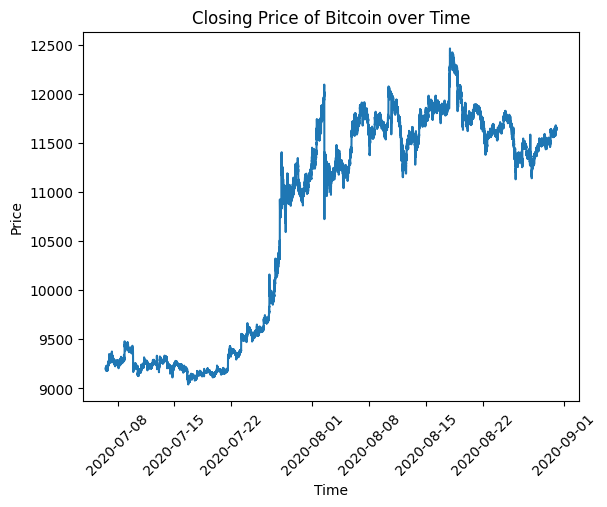

In [20]:
import matplotlib.pyplot as plt

# plot the closing price of bitcoin over time
plt.plot(df_train['Close'])
plt.title('Closing Price of Bitcoin over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


---


In [32]:
# lets start over to make sure we have the right data for prophet model

df = pd.read_csv(path,parse_dates=[0],
                    date_parser=dateparse,)
                    # index_col='Timestamp')
df.head()


/tmp/ipykernel_17213/3260538457.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path,parse_dates=[0],


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 14:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 14:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 14:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 14:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 14:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 296.5 MB


In [34]:
# ffil the missing values

df_clean = df.fillna(method='ffill').fillna(value=0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 296.5 MB


In [35]:
df_clean.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [36]:
daily_df = df_clean[['Timestamp','Close']].rename(columns={'Timestamp':'ds','Close':'y'})
daily_df.head()

,ds,y
0,2011-12-31 14:52:00+00:00,4.39
1,2011-12-31 14:53:00+00:00,4.39
2,2011-12-31 14:54:00+00:00,4.39
3,2011-12-31 14:55:00+00:00,4.39
4,2011-12-31 14:56:00+00:00,4.39


In [26]:
# slice out the ds. only take the date from 2020 to 2021

daily_df = daily_df.loc[daily_df['ds'] >= '2020-01-01']
daily_df.head()

,ds,y
4201756,2020-01-01 00:00:00+00:00,7185.05
4201757,2020-01-01 00:01:00+00:00,7181.00
4201758,2020-01-01 00:02:00+00:00,7181.00
4201759,2020-01-01 00:03:00+00:00,7184.75
4201760,2020-01-01 00:04:00+00:00,7184.60


In [27]:
daily_df.shape

# so my kernel just crash using this much data. 

(655621, 2)

In [28]:
daily_df.tail()

,ds,y
4857372,2021-03-31 06:56:00+00:00,58686.00
4857373,2021-03-31 06:57:00+00:00,58685.81
4857374,2021-03-31 06:58:00+00:00,58723.84
4857375,2021-03-31 06:59:00+00:00,58760.59
4857376,2021-03-31 07:00:00+00:00,58778.18


In [38]:
# im trying to reapply the same method but with less data
daily_df_two = daily_df.loc[daily_df['ds'] >= '2021-03-01']
daily_df_two.head()

,ds,y
4813756,2021-03-01 00:00:00+00:00,43525.18
4813757,2021-03-01 00:01:00+00:00,43555.43
4813758,2021-03-01 00:02:00+00:00,43419.65
4813759,2021-03-01 00:03:00+00:00,43397.52
4813760,2021-03-01 00:04:00+00:00,43418.46


In [39]:
daily_df_two.shape

(43621, 2)

In [40]:
# fitting the model

from prophet import Prophet

# remove timezone from ds column
daily_df['ds'] = daily_df['ds'].dt.tz_localize(None)

model = Prophet()
model.fit(daily_df)

# yep my kernel crashed again. so im going to try different approach with using 24 hours data only

10:54:24 - cmdstanpy - INFO - Chain [1] start processing


: 

## Different Approach 

Resample the data into day based


In [44]:
from datetime import datetime


In [45]:
df = pd.read_csv('./data_input/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df.set_index('Timestamp')
df = df.resample('24H').mean()
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.426667,4.450000,4.426667,4.450000,28.772626,128.033446,4.435470
2012-01-01,4.666667,4.666667,4.666667,4.666667,6.834000,32.166387,4.666667
2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000
2012-01-03,5.202000,5.202000,5.202000,5.202000,16.153804,84.167040,5.202000
2012-01-04,5.203333,5.204167,5.203333,5.204167,7.519777,39.294928,5.203372


In [47]:
# make the timestamp into a column
df = df.reset_index()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.426667,4.450000,4.426667,4.450000,28.772626,128.033446,4.435470
1,2012-01-01,4.666667,4.666667,4.666667,4.666667,6.834000,32.166387,4.666667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000
3,2012-01-03,5.202000,5.202000,5.202000,5.202000,16.153804,84.167040,5.202000
4,2012-01-04,5.203333,5.204167,5.203333,5.204167,7.519777,39.294928,5.203372


In [48]:
df.shape

(3379, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          3379 non-null   datetime64[ns]
 1   Open               3374 non-null   float64       
 2   High               3374 non-null   float64       
 3   Low                3374 non-null   float64       
 4   Close              3374 non-null   float64       
 5   Volume_(BTC)       3374 non-null   float64       
 6   Volume_(Currency)  3374 non-null   float64       
 7   Weighted_Price     3374 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 211.3 KB


In [50]:
df.isnull().sum()

Timestamp            0
Open                 5
High                 5
Low                  5
Close                5
Volume_(BTC)         5
Volume_(Currency)    5
Weighted_Price       5
dtype: int64

In [51]:
# show the missing values

df[df.isnull().any(axis=1)]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
21,2012-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1105,2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# fill the missing value with interpolation

df = df.interpolate()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.426667,4.450000,4.426667,4.450000,28.772626,128.033446,4.435470
1,2012-01-01,4.666667,4.666667,4.666667,4.666667,6.834000,32.166387,4.666667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000
3,2012-01-03,5.202000,5.202000,5.202000,5.202000,16.153804,84.167040,5.202000
4,2012-01-04,5.203333,5.204167,5.203333,5.204167,7.519777,39.294928,5.203372


In [54]:
# show the data with the time stamp 2012-01-21

df.loc[21]

Timestamp            2012-01-21 00:00:00
Open                            6.486009
High                            6.486009
Low                             6.486009
Close                           6.486009
Volume_(BTC)                   13.306189
Volume_(Currency)              84.461522
Weighted_Price                  6.486009
Name: 21, dtype: object

In [55]:
df.loc[19]

Timestamp            2012-01-19 00:00:00
Open                               6.198
High                               6.198
Low                                6.198
Close                              6.198
Volume_(BTC)                   18.692373
Volume_(Currency)             115.574659
Weighted_Price                     6.198
Name: 19, dtype: object

In [56]:
# make sure the data is filled and not deleted.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          3379 non-null   datetime64[ns]
 1   Open               3379 non-null   float64       
 2   High               3379 non-null   float64       
 3   Low                3379 non-null   float64       
 4   Close              3379 non-null   float64       
 5   Volume_(BTC)       3379 non-null   float64       
 6   Volume_(Currency)  3379 non-null   float64       
 7   Weighted_Price     3379 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 211.3 KB


Sometimes, the data set might be too huge to process, since we are using dataframe. To make sure we dont hold up too much RAM. We could try other approaches like

1. use gc.collect() - collects all the garbage values

2. del dataframe - free up some space by deleting the unused dataframe using the del command

3. Reduce the memory usage based on the data types of the columns in the dataframe(shown below)

this approach come from [here](https://www.kaggle.com/code/kaushiksuresh147/bitcoin-prices-eda-and-prediction-r2-0-99#:~:text=Bitcoin%20Historical%20Data%20Analysis) 

In [58]:
# change all the exclude the date into float 32

df['Open'] = df['Open'].astype('float32')
df['High'] = df['High'].astype('float32')
df['Low'] = df['Low'].astype('float32')
df['Close'] = df['Close'].astype('float32')
df['Volume_(BTC)'] = df['Volume_(BTC)'].astype('float32')
df['Volume_(Currency)'] = df['Volume_(Currency)'].astype('float32')
df['Weighted_Price'] = df['Weighted_Price'].astype('float32')

# df_clean = df.astype('float32')
# df_clean.info()

In [59]:
# find the memory usage from the dataframe

df.memory_usage()


Index                  128
Timestamp            27032
Open                 13516
High                 13516
Low                  13516
Close                13516
Volume_(BTC)         13516
Volume_(Currency)    13516
Weighted_Price       13516
dtype: int64

In [32]:
# this is the memory usage before we change the data type
df.memory_usage()

Index                159168
Open                  27032
High                  27032
Low                   27032
Close                 27032
Volume_(BTC)          27032
Volume_(Currency)     27032
Weighted_Price        27032
dtype: int64

Text(0, 0.5, 'Price')

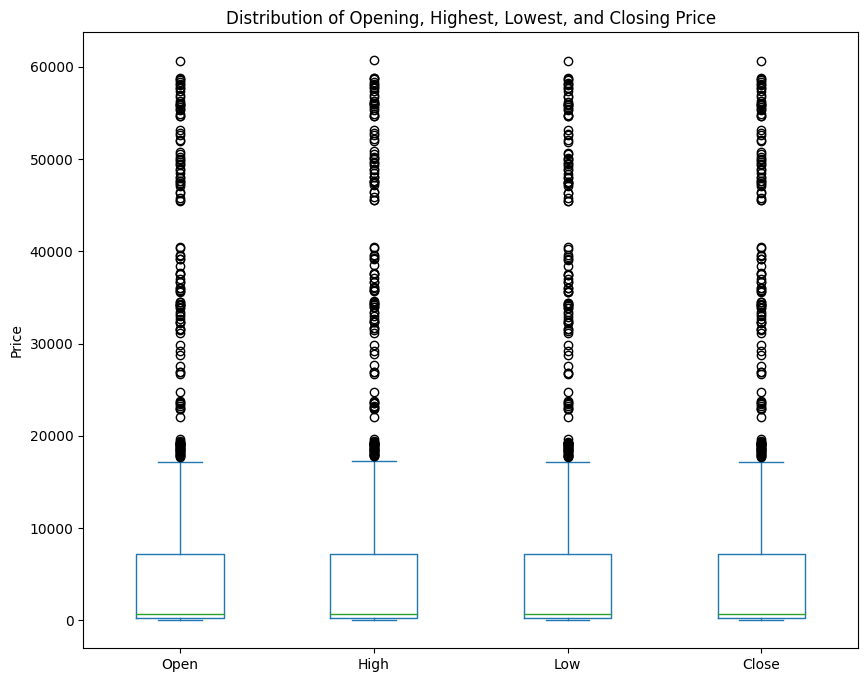

In [60]:
# Visualize the distribution of opening, highest, lowest, and closing price

df_clean[['Open','High','Low','Close']].plot(kind='box',figsize=(10,8))
plt.title('Distribution of Opening, Highest, Lowest, and Closing Price')
plt.ylabel('Price')

In [61]:
df_clean.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.426667,4.450000,4.426667,4.450000,28.772627,128.033447,4.435471
2012-01-01,4.666667,4.666667,4.666667,4.666667,6.834000,32.166386,4.666667
2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000
2012-01-03,5.202000,5.202000,5.202000,5.202000,16.153805,84.167038,5.202000
2012-01-04,5.203333,5.204167,5.203333,5.204167,7.519777,39.294930,5.203372


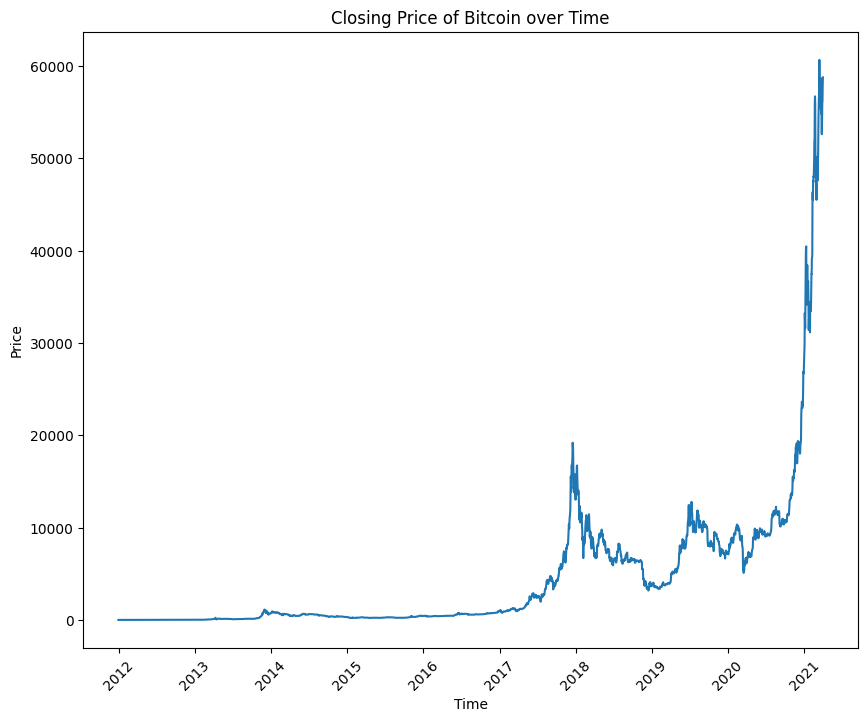

In [62]:
# plot the closing price of bitcoin over time

plt.figure(figsize=(10,8))
plt.plot(df_clean['Close'])
plt.title('Closing Price of Bitcoin over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [64]:
# make ds and y for prophet

df_prophet = df[['Timestamp','Close']].rename(columns={'Timestamp':'ds','Close':'y'})
df_prophet.head()

,ds,y
0,2011-12-31,4.450000
1,2012-01-01,4.666667
2,2012-01-02,5.000000
3,2012-01-03,5.202000
4,2012-01-04,5.204167


In [75]:
df_prophet.tail()

,ds,y
3374,2021-03-27,54649.480469
3375,2021-03-28,56007.894531
3376,2021-03-29,56259.964844
3377,2021-03-30,58018.199219
3378,2021-03-31,58783.214844


In [65]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

09:23:12 - cmdstanpy - INFO - Chain [1] start processing
09:23:12 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
3739,2022-03-27
3740,2022-03-28
3741,2022-03-29
3742,2022-03-30
3743,2022-03-31


In [71]:
forecast = model.predict(future)
forecast[['ds', 'trend','weekly','yearly','yhat']].tail()

,ds,trend,weekly,yearly,yhat
3739,2022-03-27,41806.097864,15.860007,1441.909613,43263.867484
3740,2022-03-28,41844.105658,1.082959,1297.429563,43142.618180
3741,2022-03-29,41882.113452,10.457369,1144.252318,43036.823138
3742,2022-03-30,41920.121246,22.635647,983.882780,42926.639672
3743,2022-03-31,41958.129040,-24.480556,818.016217,42751.664701


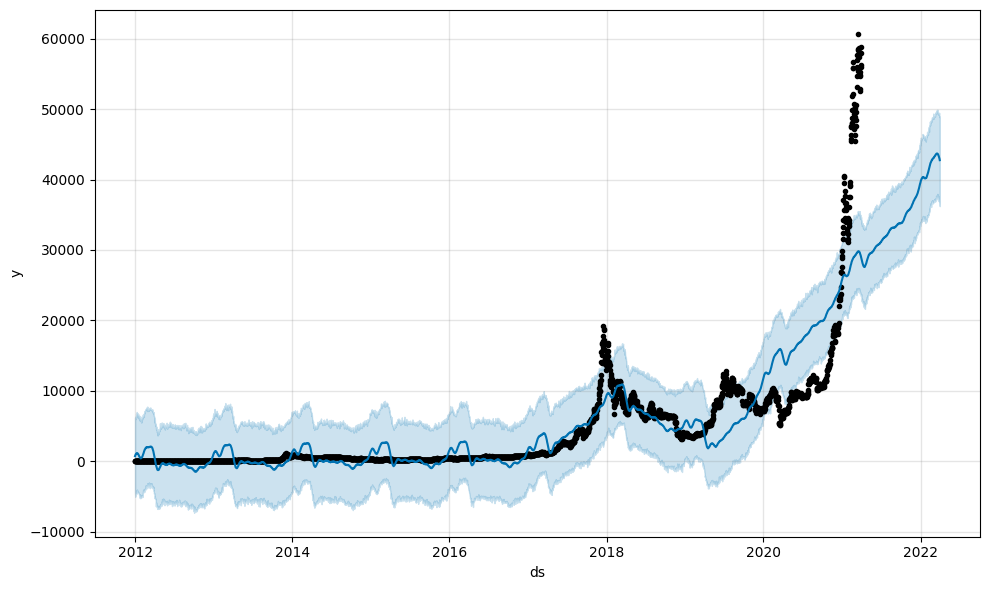

In [72]:
# visualize the forecast

forecast_fig = model.plot(forecast)

so from the graph, the black point represents the actual data and the blue one shows the fitted time series prediction. theres a lot of innacurate prediction start from 2021.

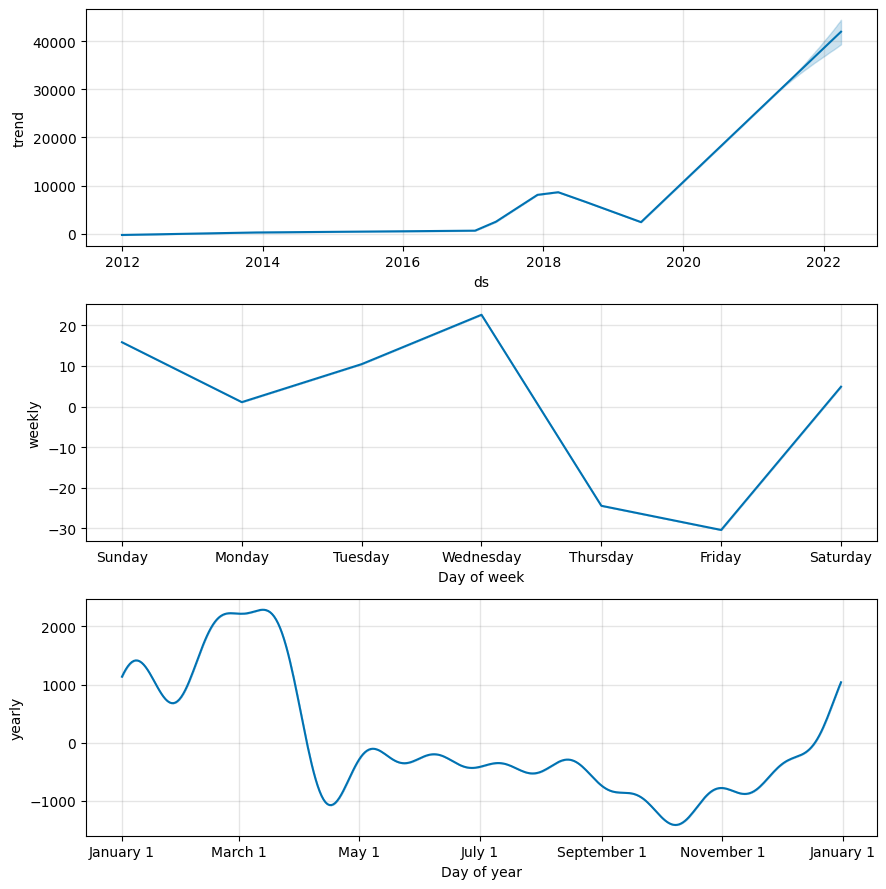

In [76]:
forecast_viz = model.plot_components(forecast)

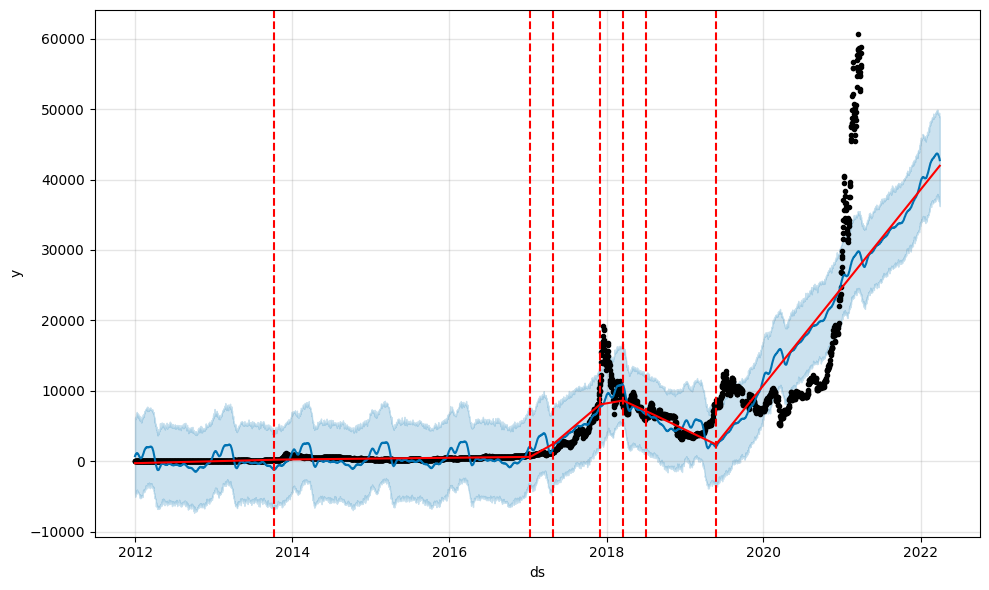

In [79]:
from prophet.plot import add_changepoints_to_plot

# show the trend line

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


09:40:33 - cmdstanpy - INFO - Chain [1] start processing
09:40:33 - cmdstanpy - INFO - Chain [1] done processing


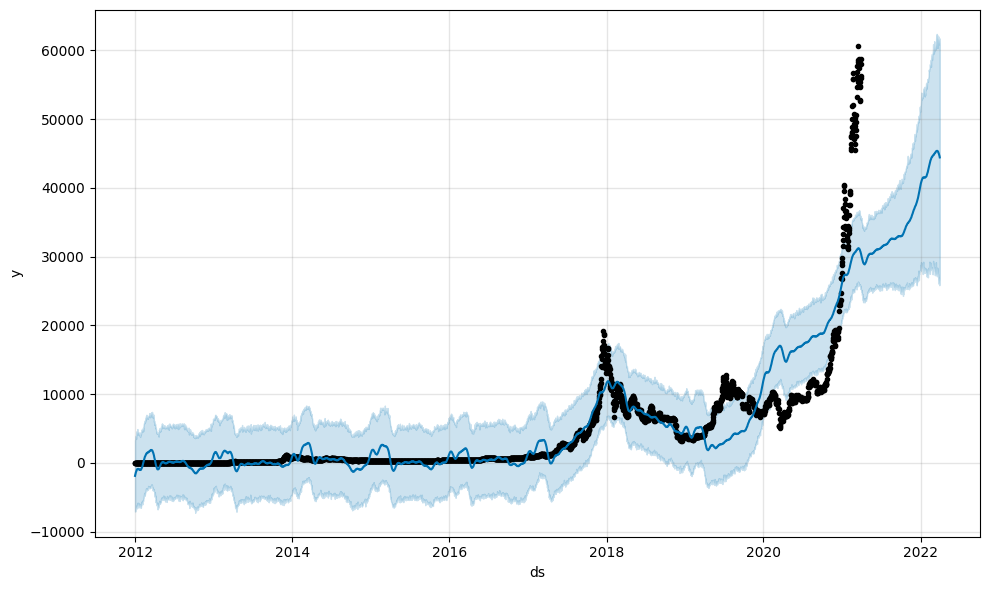

In [90]:
# adjusting trend flexibility

m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df_prophet).predict(future)
fig = m.plot(forecast)

09:41:14 - cmdstanpy - INFO - Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] done processing


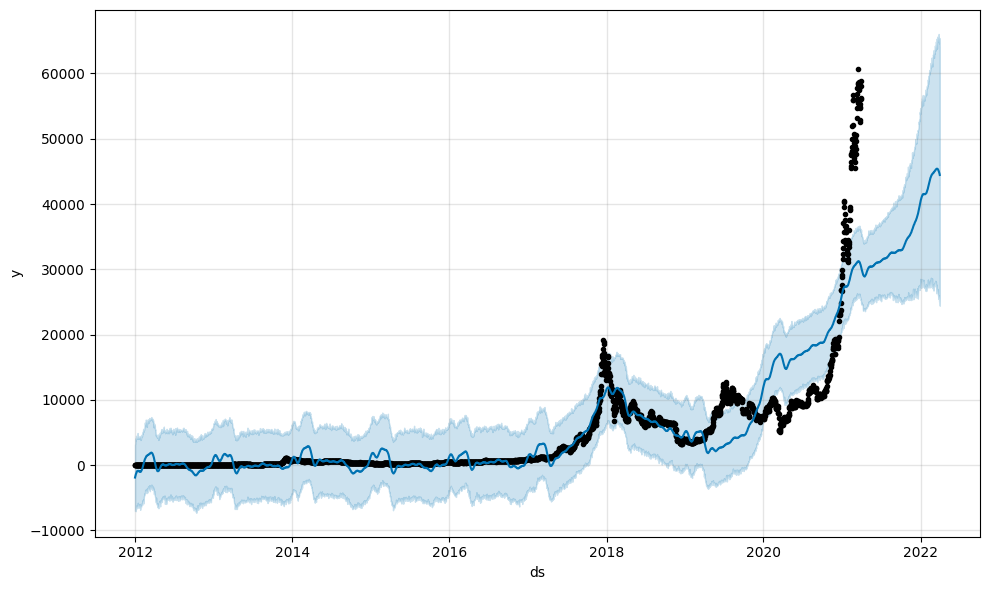

In [91]:
# adjusting seasonality flexibility

m = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1)
forecast = m.fit(df_prophet).predict(future)
fig = m.plot(forecast)


09:54:36 - cmdstanpy - INFO - Chain [1] start processing
09:54:37 - cmdstanpy - INFO - Chain [1] done processing


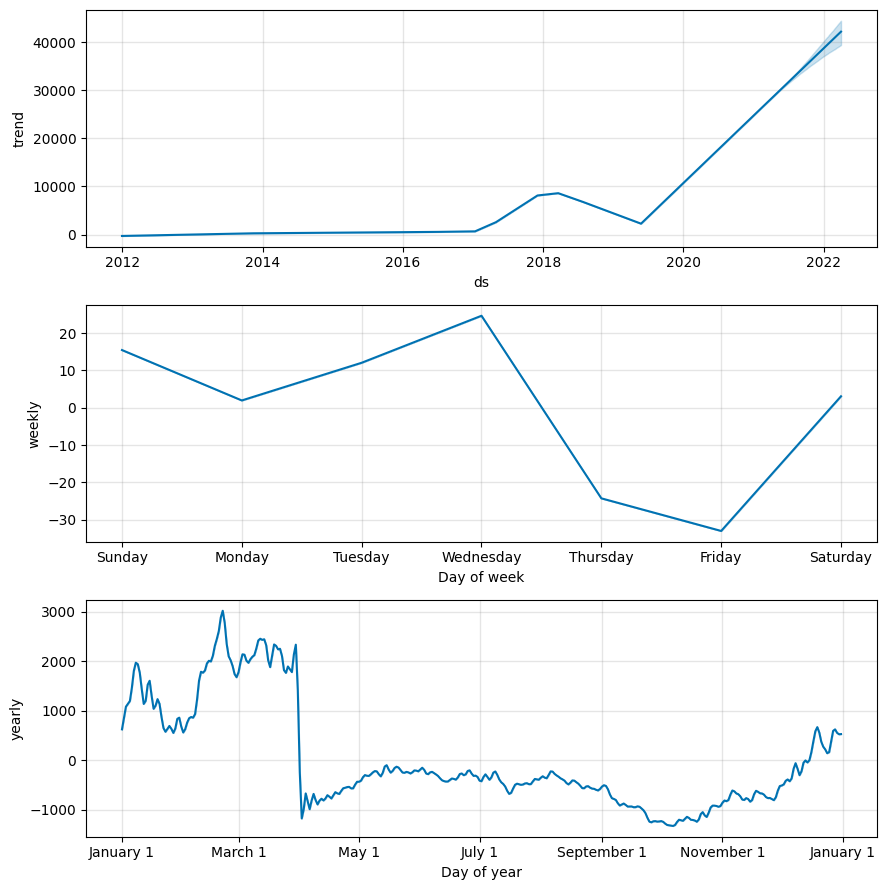

In [95]:
# Fourier Order for Seasonality

# fitting model
model_tuning_seasonality = Prophet(
    weekly_seasonality=3, # default = 3
    yearly_seasonality=100 # default = 10
    )
model_tuning_seasonality.fit(df_prophet)

# forecasting
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_seasonality.predict(future)

# visualize
fig = model_tuning_seasonality.plot_components(forecast)

09:56:03 - cmdstanpy - INFO - Chain [1] start processing
09:56:03 - cmdstanpy - INFO - Chain [1] done processing


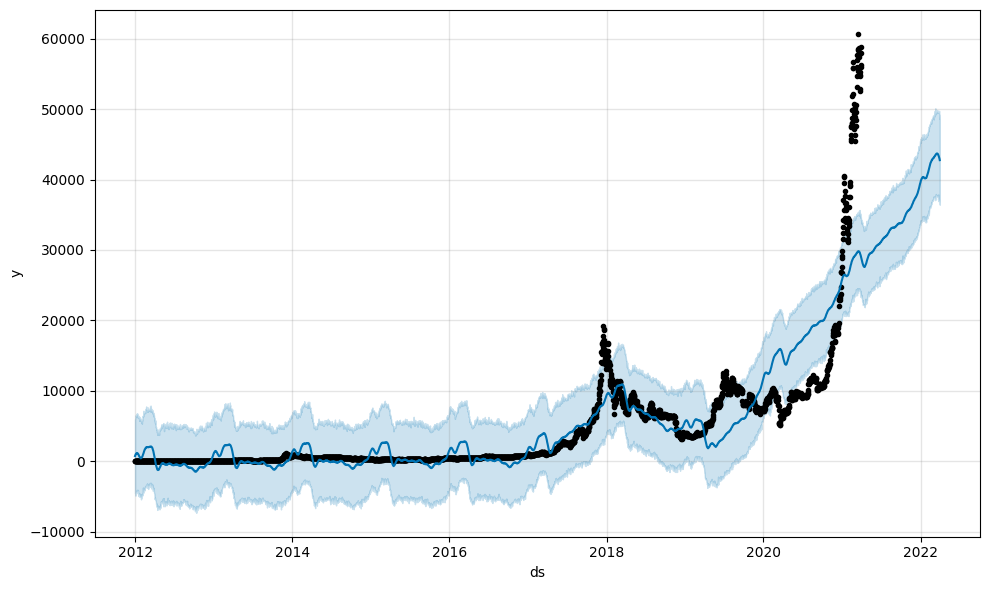

In [97]:
# check if holiday effect is significant

# fitting model
model_tuning_holiday = Prophet(
    holidays_prior_scale=0.1 # default = 10
    )
model_tuning_holiday.fit(df_prophet)

# forecasting
future = model_tuning_holiday.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_holiday.predict(future)

# visualize
fig = model_tuning_holiday.plot(forecast)


so its a bit tricky to know whether the holiday effect took effect on this graph, because bitcoin trend seems a bit more complex than it should and theres many external factor than just the holiday. i'll try to find more reference for finding the correct timeseries method for bitcoin 